In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data = pd.read_csv('Cities1.csv')

C:\Users\user\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


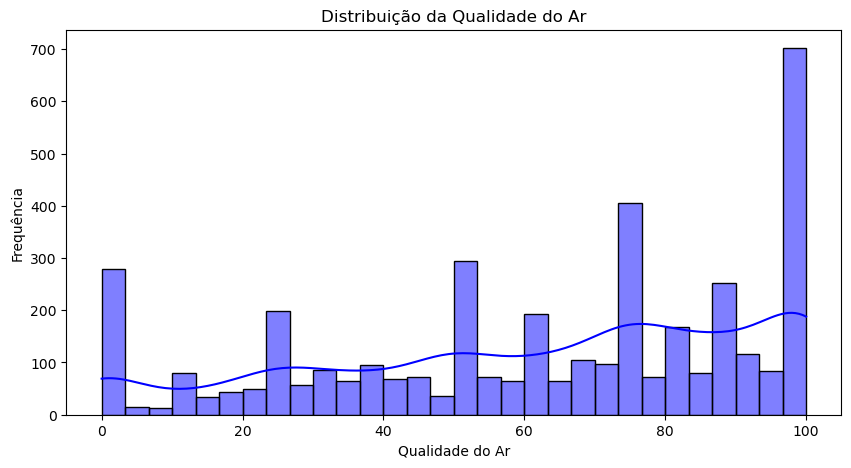

In [13]:
# histograma que mostra a distribuição da qualidade do ar 
sns.histplot(data['AirQuality'].dropna(), bins=30, kde=True, color='blue')
plt.title('Distribuição da Qualidade do Ar')
plt.xlabel('Qualidade do Ar')
plt.ylabel('Frequência')
plt.show()

C:\Users\user\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


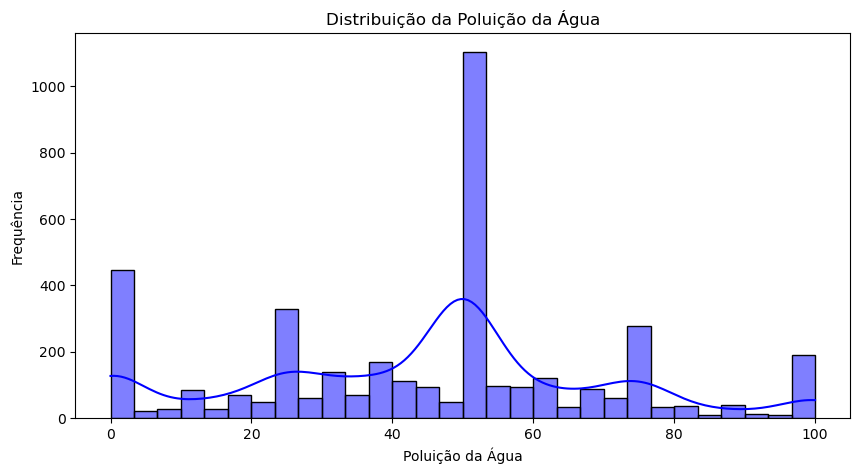

In [14]:
# gráfico mostrando a distribuição da poluição da água
plt.figure(figsize=(10, 5))
sns.histplot(data['WaterPollution'].dropna(), bins=30, kde=True, color='blue')
plt.title('Distribuição da Poluição da Água')
plt.xlabel('Poluição da Água')
plt.ylabel('Frequência')
plt.show()

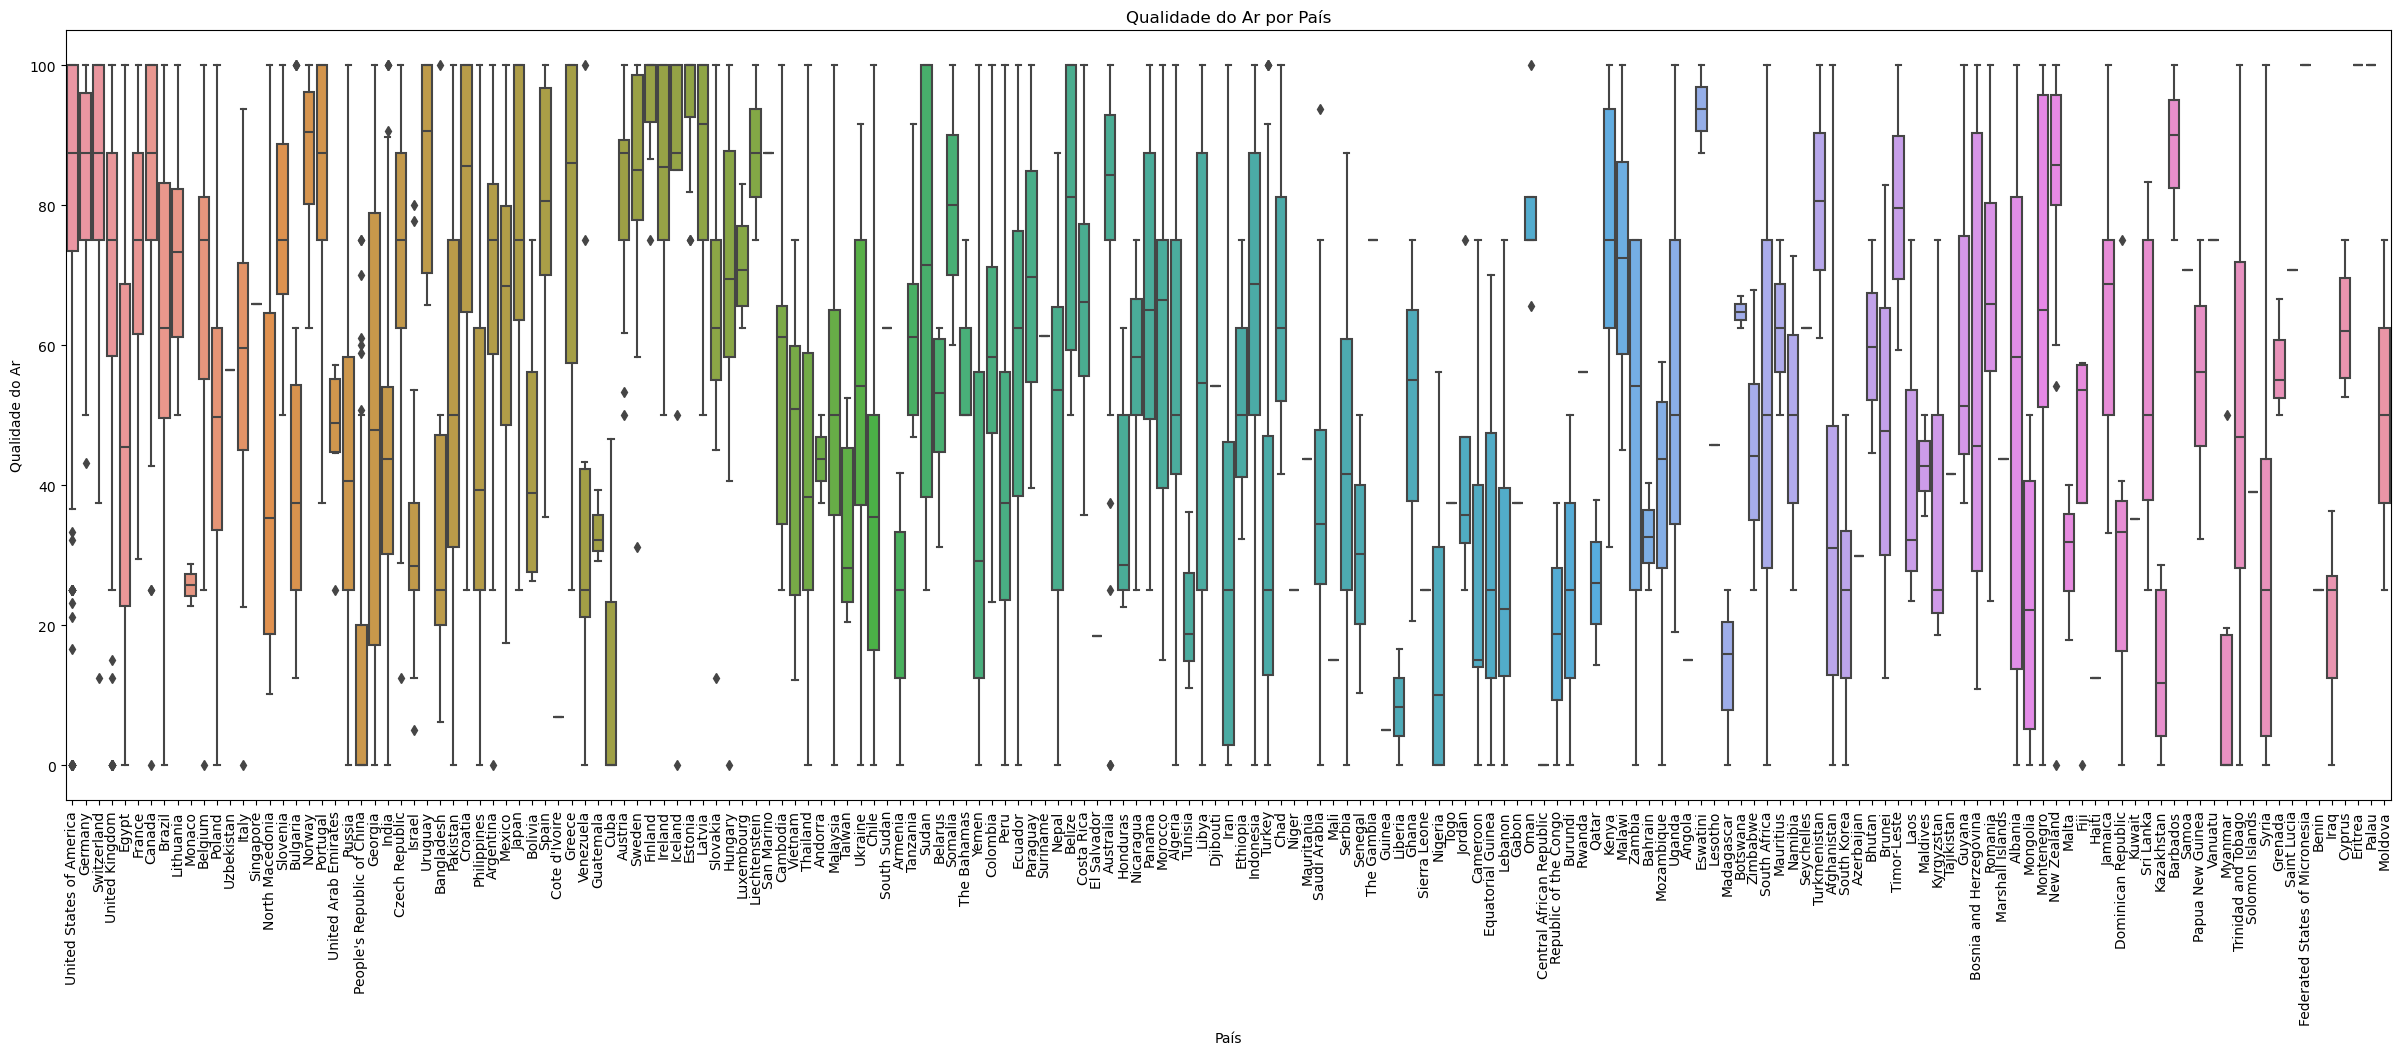

In [16]:
# mostrando a distribuição da qualidade do ar em diferentes países
plt.figure(figsize=(30, 10))
sns.boxplot(x='Country', y='AirQuality', data=data)
plt.xticks(rotation=90)
plt.title('Qualidade do Ar por País')
plt.xlabel('País')
plt.ylabel('Qualidade do Ar')
plt.show()


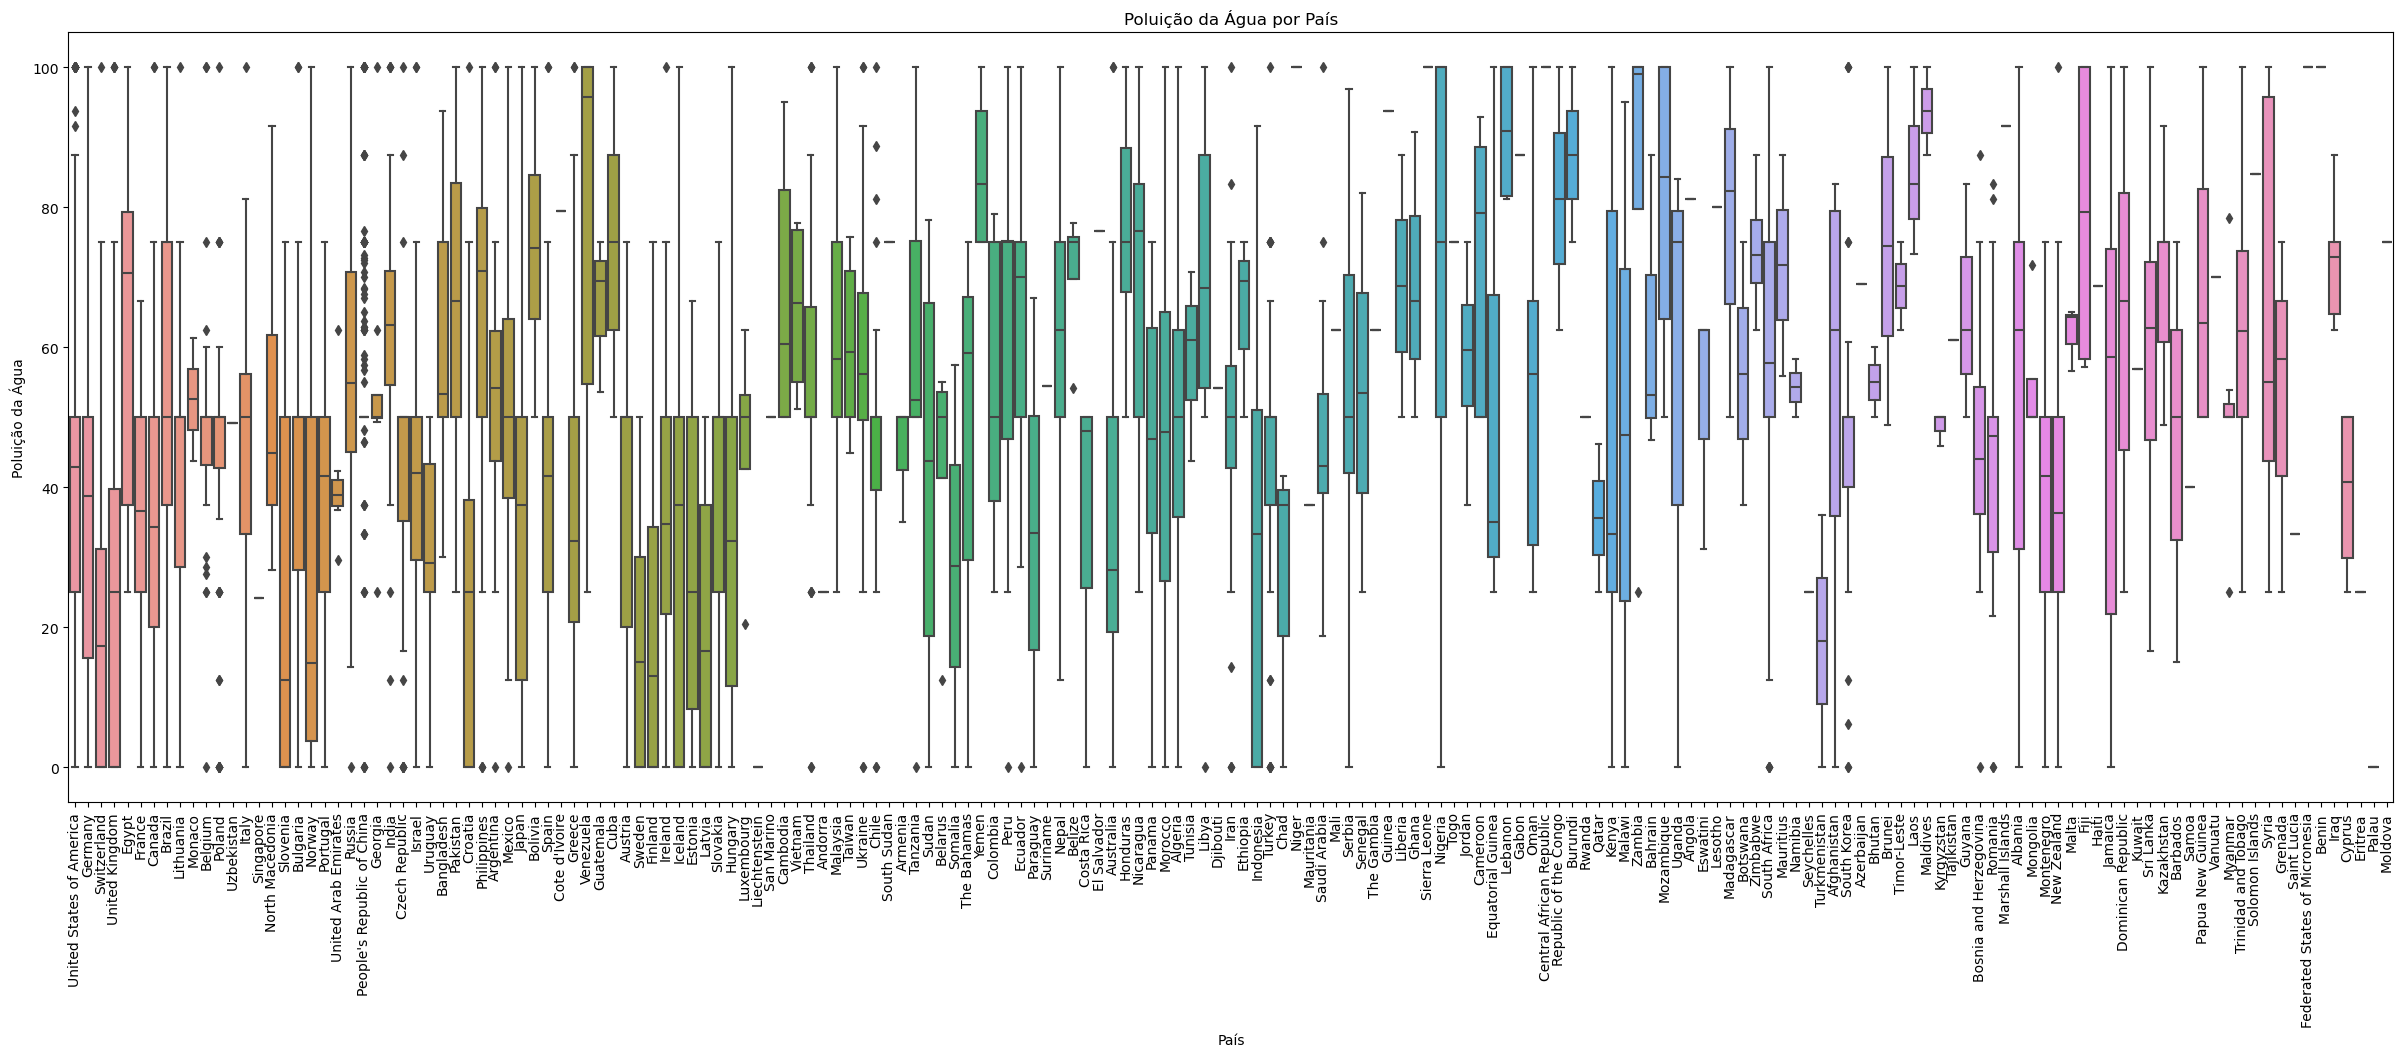

In [17]:
# distribuição da poluição da água em diferentes países.
plt.figure(figsize=(30, 10))
sns.boxplot(x='Country', y='WaterPollution', data=data)
plt.xticks(rotation=90)
plt.title('Poluição da Água por País')
plt.xlabel('País')
plt.ylabel('Poluição da Água')
plt.show()


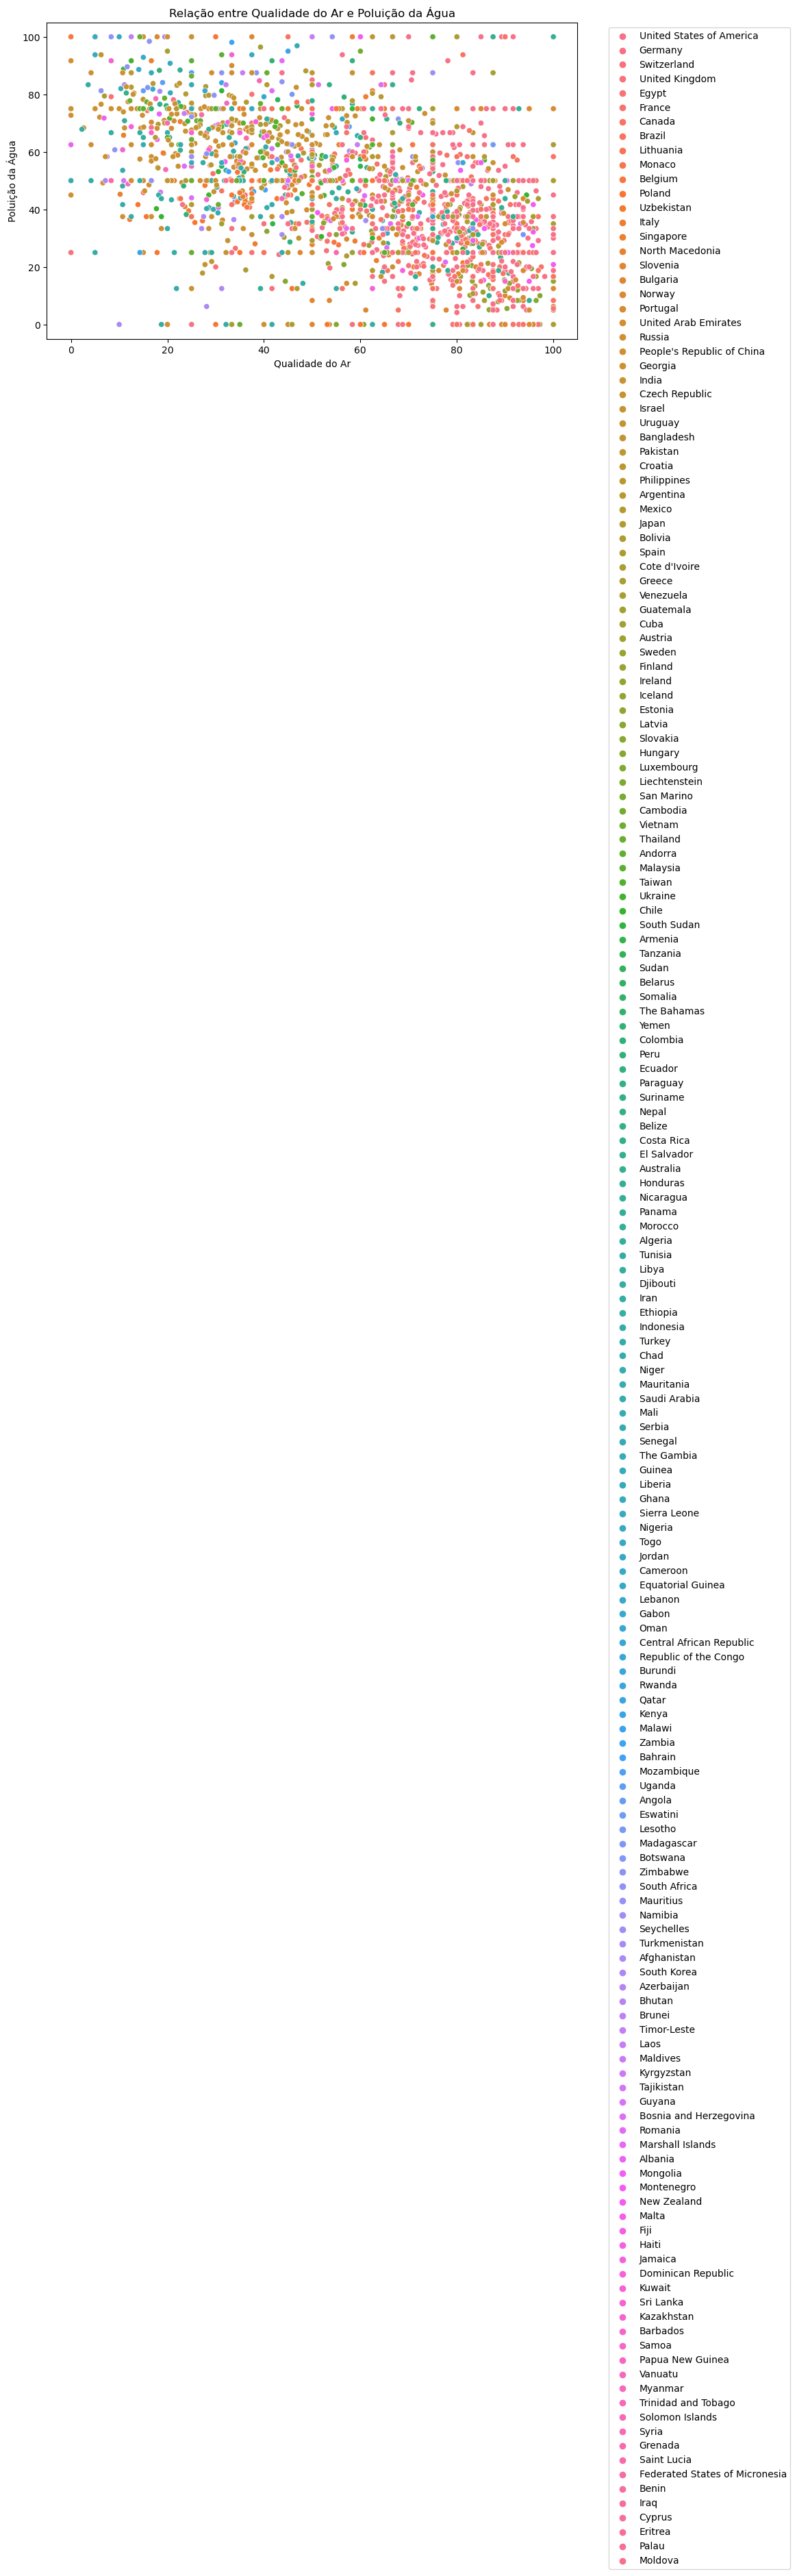

In [18]:
# mostra a relação entre a qualidade do ar e a poluição da água
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AirQuality', y='WaterPollution', data=data, hue='Country')
plt.title('Relação entre Qualidade do Ar e Poluição da Água')
plt.xlabel('Qualidade do Ar')
plt.ylabel('Poluição da Água')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

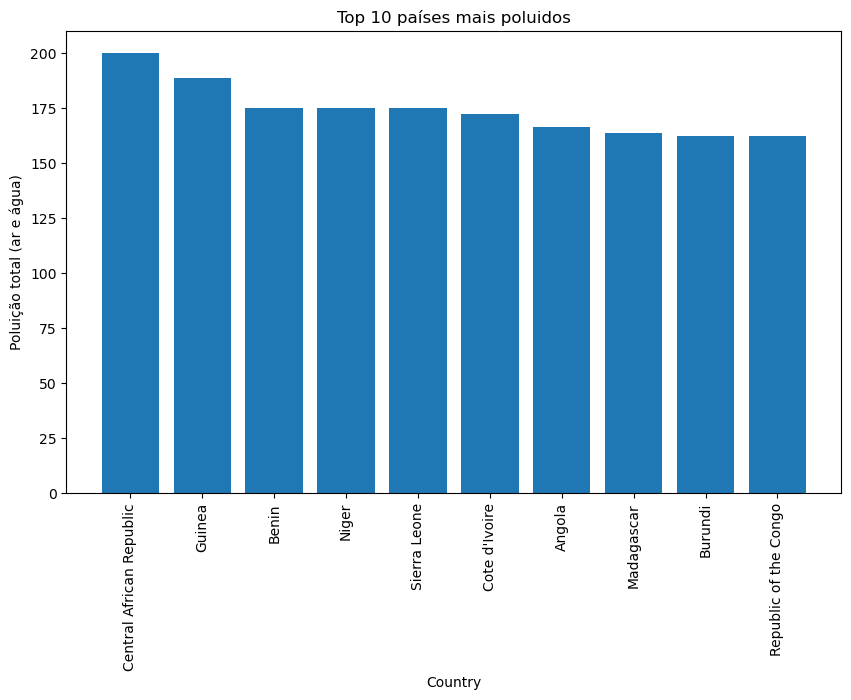

In [54]:
# calcular a média de AirQuality e WaterPollution por país
data_grouped = data.groupby('Country').agg({'AirQuality': 'mean', 'WaterPollution': 'mean'}).reset_index()

"""combinar qualidade do ar com poluição da agua,
usamos o '100 - AirQuality'  porque os valores mais altos de AirQuality indicam uma melhor qualidade do ar"""
data_grouped['TotalPollution'] = (100 - data_grouped['AirQuality']) + data_grouped['WaterPollution']

# separar 10 países com maior poluição combinada
top_10_countries = data_grouped.nlargest(10, 'TotalPollution')

plt.figure(figsize=(10, 6))
plt.bar(top_10_countries['Country'], top_10_countries['TotalPollution'])
plt.xlabel('Country')
plt.ylabel('Poluição total (ar e água)')
plt.title('Top 10 países mais poluidos')
plt.xticks(rotation=90)
plt.show()

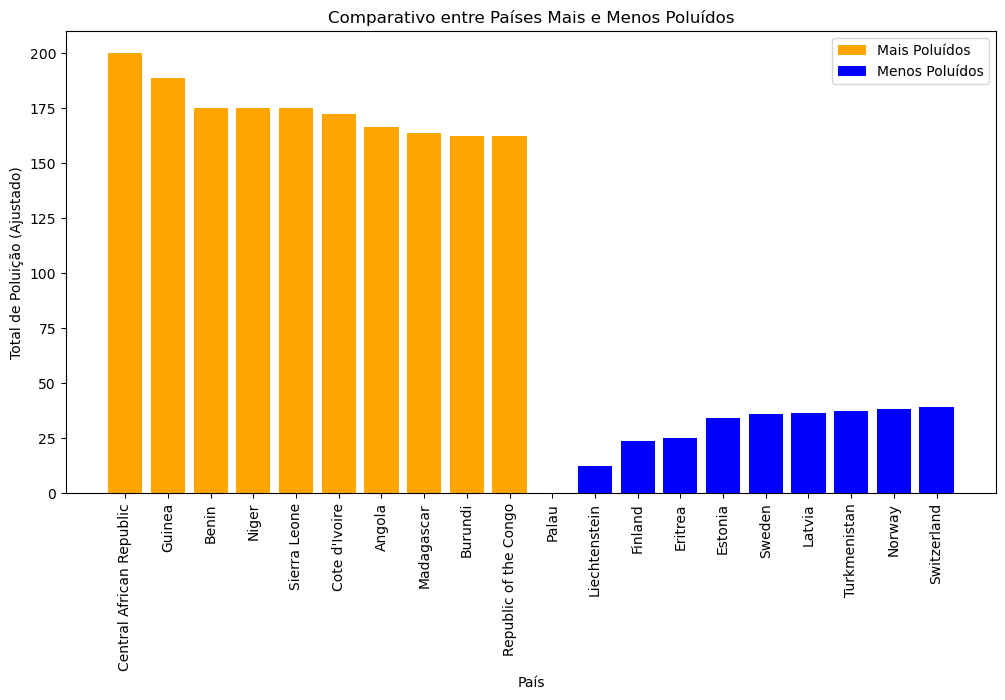

In [42]:
# mesmo código utilizado no notebook anterior
data_grouped = data.groupby('Country').agg({'AirQuality': 'mean', 'WaterPollution': 'mean'}).reset_index()

data_grouped['TotalPollution'] = (100 - data_grouped['AirQuality']) + data_grouped['WaterPollution']

top_10_most_polluted = data_grouped.nlargest(10, 'TotalPollution')
top_10_least_polluted = data_grouped.nsmallest(10, 'TotalPollution')

# gráfico de barras comparativo
plt.figure(figsize=(12, 6))

plt.bar(top_10_most_polluted['Country'], top_10_most_polluted['TotalPollution'], color='orange', label='Mais Poluídos')
plt.bar(top_10_least_polluted['Country'], top_10_least_polluted['TotalPollution'], color='blue', label='Menos Poluídos')

plt.xlabel('País')
plt.ylabel('Total de Poluição (Ajustado)')
plt.title('Comparativo entre Países Mais e Menos Poluídos')
plt.xticks(rotation=90)
plt.legend()

plt.show()